In [1]:
print("Hello, Jupyter!")

Hello, Jupyter!


In [1]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images to [0,1] range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(f"Training Data Shape: {x_train.shape}")  # (50000, 32, 32, 3)
print(f"Test Data Shape: {x_test.shape}")  # (10000, 32, 32, 3)

Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)


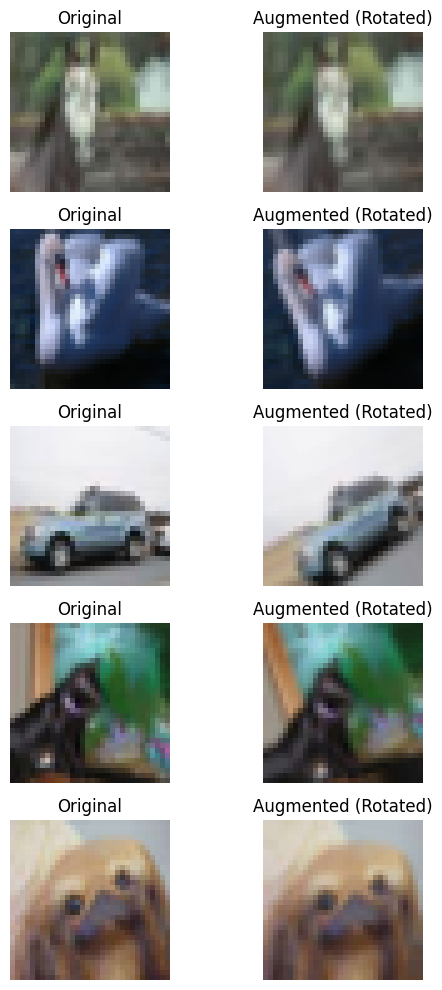

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with random rotation
datagen = ImageDataGenerator(rotation_range=30)  # Rotates images up to 30 degrees

# Select 5 random images from the training dataset
random_indices = np.random.choice(x_train.shape[0], 5, replace=False)
original_images = x_train[random_indices]

# Apply augmentation
augmented_images = np.array([datagen.random_transform(img) for img in original_images])

# Plot original vs. augmented images
fig, axes = plt.subplots(5, 2, figsize=(6, 10))

for i in range(5):
    # Show original image
    axes[i, 0].imshow(original_images[i])
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")

    # Show augmented image
    axes[i, 1].imshow(augmented_images[i])
    axes[i, 1].set_title("Augmented (Rotated)")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0,1] range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to categorical (One-Hot Encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training Data Shape: {x_train.shape}, Labels Shape: {y_train.shape}")
print(f"Test Data Shape: {x_test.shape}, Labels Shape: {y_test.shape}")

Training Data Shape: (50000, 32, 32, 3), Labels Shape: (50000, 10)
Test Data Shape: (10000, 32, 32, 3), Labels Shape: (10000, 10)


In [8]:
def create_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2,2),
        
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Create CNN model
cnn_original = create_cnn()

# Train the model on the original dataset
history_original = cnn_original.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

C:\Users\Chelsea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.2731 - loss: 1.9312 - val_accuracy: 0.5123 - val_loss: 1.3576
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5143 - loss: 1.3677 - val_accuracy: 0.6019 - val_loss: 1.1240
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5807 - loss: 1.1771 - val_accuracy: 0.6325 - val_loss: 1.0428
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6248 - loss: 1.0619 - val_accuracy: 0.6512 - val_loss: 1.0054
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6627 - loss: 0.9686 - val_accuracy: 0.6836 - val_loss: 0.9051
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6854 - loss: 0.9096 - val_accuracy: 0.6895 - val_loss: 0.8950
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7028 - loss: 0.8473 - val_accuracy: 0.6953 - val_loss: 0.8749
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7255 - loss: 0.7904 - 

In [10]:
# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to the training data
datagen.fit(x_train)

# Create another CNN model for training on augmented data
cnn_augmented = create_cnn()

# Train the model using augmented data
history_augmented = cnn_augmented.fit(datagen.flow(x_train, y_train, batch_size=64),
                                      epochs=10, validation_data=(x_test, y_test))

C:\Users\Chelsea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 90ms/step - accuracy: 0.2657 - loss: 1.9651 - val_accuracy: 0.4837 - val_loss: 1.4080
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.4507 - loss: 1.5178 - val_accuracy: 0.5483 - val_loss: 1.2415
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.5053 - loss: 1.3909 - val_accuracy: 0.5782 - val_loss: 1.1882
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.5411 - loss: 1.2941 - val_accuracy: 0.6082 - val_loss: 1.1136
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.5635 - loss: 1.2515 - val_accuracy: 0.6300 - val_loss: 1.0496
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.5773 - loss: 1.2047 - val_accuracy: 0.6517 - val_loss: 0.9888
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5915 - loss: 1.1734 - val_accuracy: 0.6549 - val_loss: 0.9853
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.6029 - loss: 1.1355 - 

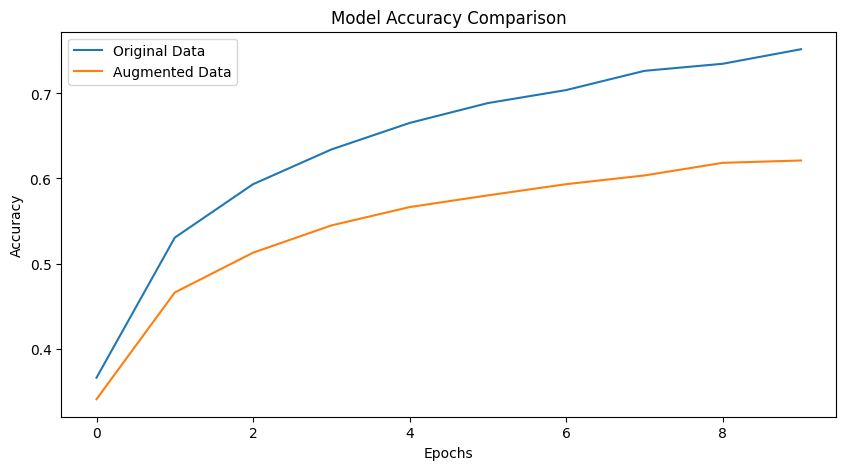

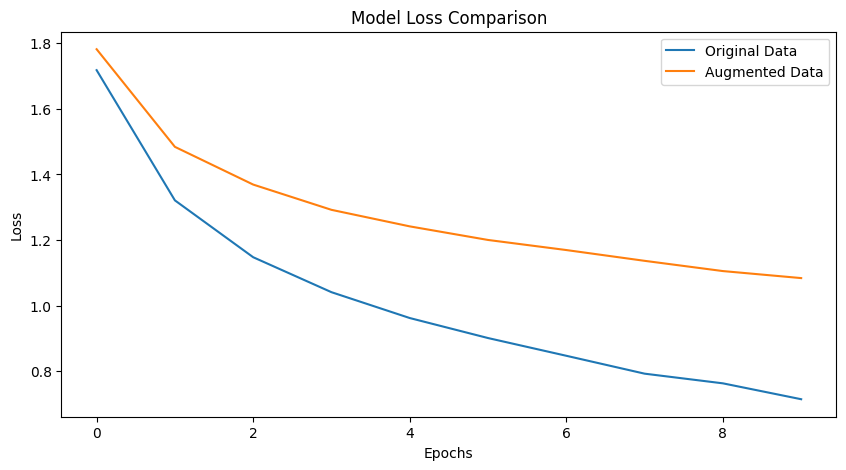

In [11]:
# Plot Accuracy Comparison
plt.figure(figsize=(10,5))
plt.plot(history_original.history['accuracy'], label='Original Data')
plt.plot(history_augmented.history['accuracy'], label='Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(10,5))
plt.plot(history_original.history['loss'], label='Original Data')
plt.plot(history_augmented.history['loss'], label='Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Comparison')
plt.legend()
plt.show()